# Data visualization



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import plotly_express  as px
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud,STOPWORDS


warnings.filterwarnings('ignore')

In [2]:
books_data = pd.read_csv('../data/books_data.csv')
ratings_data = pd.read_csv('../data/books_ratings_data.csv')
book_tags_data = pd.read_csv('../data/book_tags_data.csv')
tags_data = pd.read_csv('../data/tags_data.csv')

In [3]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books_data.shape

(10000, 23)

## Data Exploratory Analysis

### Top Rated Books

    
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Top rated books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
    output: bar plot to visualize Top rated books in the dataset
    


In [5]:
def top_rated_books(books_data):
    top_rated_books = books_data.sort_values('average_rating', ascending=False)
    df_top_rated = top_rated_books[:15]
    fig = px.bar(df_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings')
    fig.update_layout(xaxis_range=[0,5])
    fig.show()
top_rated_books(books_data)

### Sorting data according to the average ratings

In [13]:
sortedData = books_data[books_data['ratings_count']>=1500]
sortedData = sortedData.sort_values('average_rating', ascending=False)
sortedData.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,3275,8,8,21457576,11,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,...,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,17332218,17332218,16482835,34,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,...,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,8854,95602,95602,920037,6,842339523,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,...,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,7947,5031805,5031805,40769318,96,1433502410,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,...,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...


Text(0, 0.5, 'Book Title')

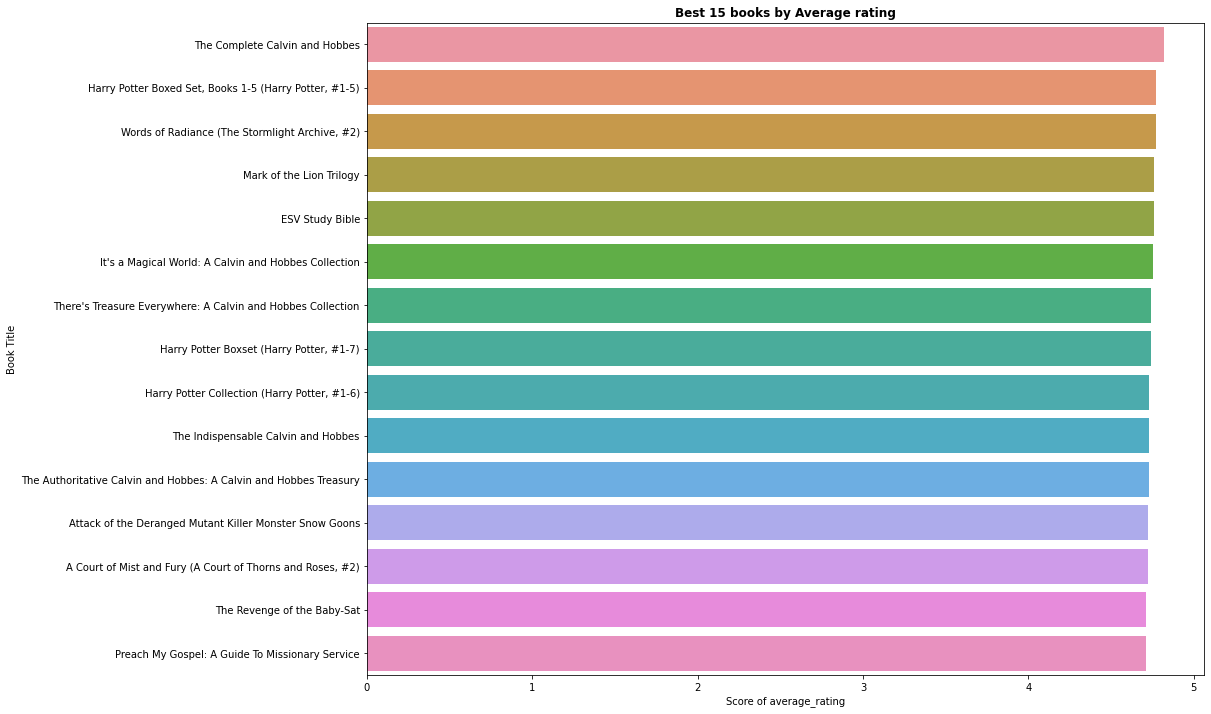

In [14]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=sortedData['average_rating'].head(15), y=sortedData['title'].head(15), data=sortedData)
plt.title('Best ' + str(15) + ' books by ' + 'average_rating'.replace('_',' ').capitalize(), weight='bold')
plt.xlabel('Score of ' + 'average_rating')
plt.ylabel('Book Title')    

### Average Ratings Distribution
    
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Average ratings for the books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
    output: Histogram to visualize Average ratings for the books in the dataset
    



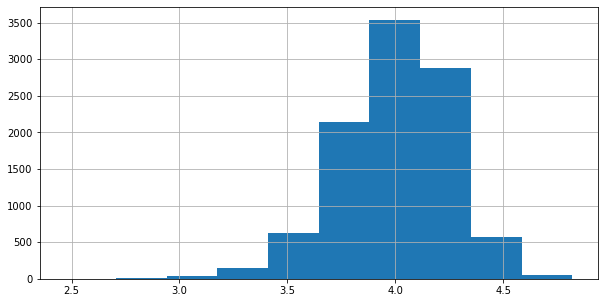

In [18]:
def avg_rating(books_data):
    plt.figure(figsize=(10,5))
    books_data["average_rating"].hist()
    display()
avg_rating(books_data)

### Top Authors

    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Top Authors for the books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
    output: Interactive Barplot to visualize top authors of books in the dataset
    



In [19]:
def topauthors(books_data):
    top_authors = books_data['authors'].value_counts().reset_index()
    top_authors.columns = ['value', 'count']
    top_authors['value'] = top_authors['value']
    top_authors = top_authors.sort_values('count')
    fig = px.bar(top_authors.tail(10), x="count", y="value", color='value',
                 width=1000, height=700)
    fig.show()
topauthors(books_data)

### Treemap
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize dataset in form of Treemap.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
    output: Treemap to visualize books in the dataset
    



In [22]:
def get_treemap(books_data):
    
    dropna= books_data.dropna()
    fig = px.treemap(dropna, path=['original_publication_year','language_code', "average_rating"],
                      color='average_rating')
    fig.show()
get_treemap(books_data)

### Heatmap
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the correlation between all the columns.
    
    Params:
    -------------------
    input: books_data
           =>dataframe


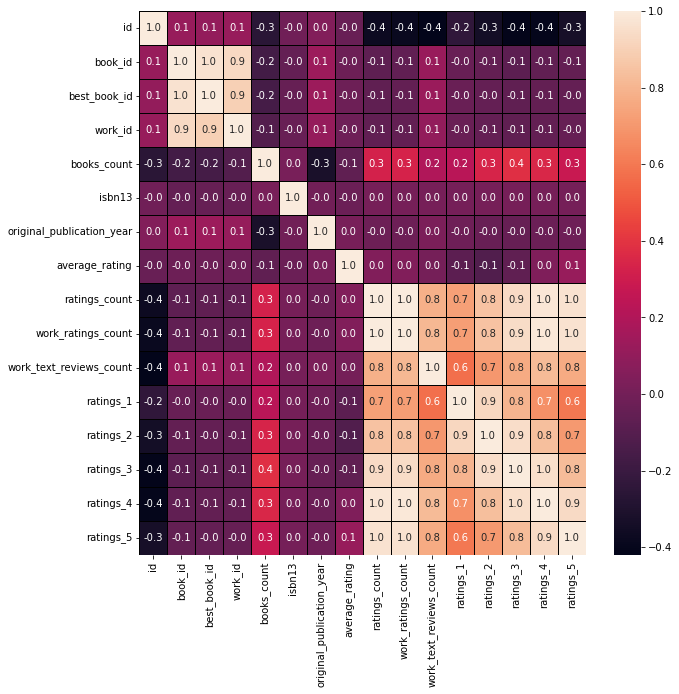

In [23]:
def get_heatmap(books_data):
    f,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(books_data.corr(), annot=True, linewidths=0.6,linecolor="black", fmt= '.1f',ax=ax)
    plt.show() 
get_heatmap(books_data)

### Number of books in each year
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the histogram plot to visualize the number of books published each year.
    
    Params:
    -------------------
    input: books_data
           =>dataframe



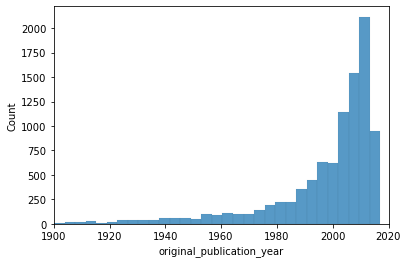

In [24]:
def get_histplot(books_data):
    sns.histplot(x="original_publication_year", data=books_data, bins=1000)
    plt.xlim(1900,2020);
get_histplot(books_data)

### Number of Authors Ratings Rates
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the Number of Authors Ratings Rates for year 2015 and 2016.
    
    Params:
    -------------------
    input: books_data
           =>dataframe




In [26]:
def getpiechart(books_data):
    df = books_data[books_data.original_publication_year == 2015].iloc[:7,:]
    pie1 = df.ratings_1
    df1 = books_data[books_data.original_publication_year == 2016].iloc[:7,:]
    pie2 = df1.ratings_1
    labels = df.authors.value_counts().index

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
                  1, 1)
    fig.add_trace(go.Pie(labels=labels, values=pie2, name="Number Of Authors Rates"),
                  1, 2)
    fig.update_traces(hole=.45, hoverinfo="label+percent+name")
    fig.update_layout(
        height=800, width=800,
        annotations=[dict(text='2015', x=0.175, y=0.5, font_size=14, showarrow=False),
                     dict(text='2016', x=0.82, y=0.5, font_size=14, showarrow=False)])
    fig.show()
getpiechart(books_data)

### Stopwords of Authors
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the Stopwords of author.
    
    Params:
    -------------------
    input: books_data
           =>dataframe


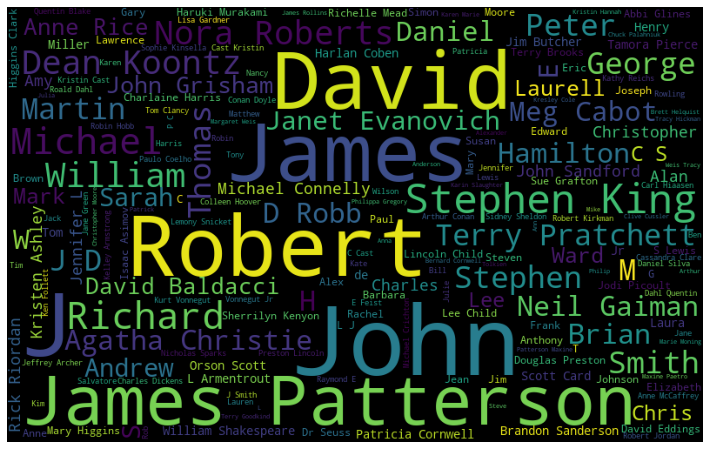

In [17]:
stop_words=set(STOPWORDS)
author_string = " ".join(books_data['authors'])


def getstopwords(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)
getstopwords(author_string)